### Deep ML problem id = 14

#### Write a Python function that fits a straight line (or hyperplane) to data using linear regression. Instead of using loops or gradient descent, you’ll use a direct formula called the normal equation.

#### The function will take:

a matrix of input features (X), where each row is a data point and each column is a feature (the first column should be all 1’s if you want an intercept term),

a vector of outputs (y), which are the values you want to predict.

The function should return the coefficients (the numbers that define the line or hyperplane).

Finally, round each coefficient to four decimal places.

A result like -0.0 is valid—it just means the value is extremely close to zero but slightly negative.

### Example
Input:

X = [[1, 1], [1, 2], [1, 3]],

y = [1, 2, 3]

Output:

[0.0, 1.0]

Reasoning:

The linear model is y = 0.0 + 1.0*x, perfectly fitting the input data.

In [12]:
# Use following values for X and Y to solve Deep ML use case
# Feature Matrix
X = [[1, 1], [1, 2], [1, 3]]

# Target Vector
y = [1, 2, 3]

In [ ]:
# Use following values for of 100 data points
import numpy as np
# Random seed for reproducibility
np.random.seed(42)

# Generate 100 feature values (x) uniformly between 1 and 10
x_vals = np.linspace(1, 10, 100)

# Add intercept column of 1s
X = np.column_stack((np.ones_like(x_vals), x_vals))

# True relationship: y = 2.5 + 1.7 * x + noise
true_intercept = 2.5
true_slope = 1.7
noise = np.random.normal(0, 1, size=100)  # Gaussian noise

y = true_intercept + true_slope * x_vals + noise

### Solution

##### Using NumPy

In [2]:
import numpy as np
def linear_regression_normal_equation_numpy(X: list[list[float]], y: list[float]) -> list[float]:
	# Your code here, make sure to round
	# convert to numpy arrays
	X = np.array(X, dtype = float)
	y = np.array(y, dtype = float)

	# the equation to calculate the coefficients as follows
	# coeff = (X^T * X)^(-1) * X^T *y
	theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
	
	# Rounding off the coefficient
	theta = np.round(theta, 4)
	
	return theta.tolist()

In [3]:
print(linear_regression_normal_equation_numpy(X,y))

[2.3119, 1.7153]


##### Using PyTorch

In [16]:
import torch

def linear_regression_normal_equation_torch(X: list[list[float]], y: list[float]) -> list[float]:
    # convert to torch tensors
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    # the equation to calculate the coefficients as follows
    # coeff = (X^T * X)^(-1) * X^T *y
    theta = torch.linalg.inv(X.T @ X) @ (X.T @ y)

    # Rounding off the coefficient
    theta = torch.round(theta * 10000) / 10000  # PyTorch doesn’t have np.round with decimals

    return theta.tolist()


In [17]:
print(linear_regression_normal_equation_torch(X,y))

[0.0, 1.0]


#### Linear Regression Fit

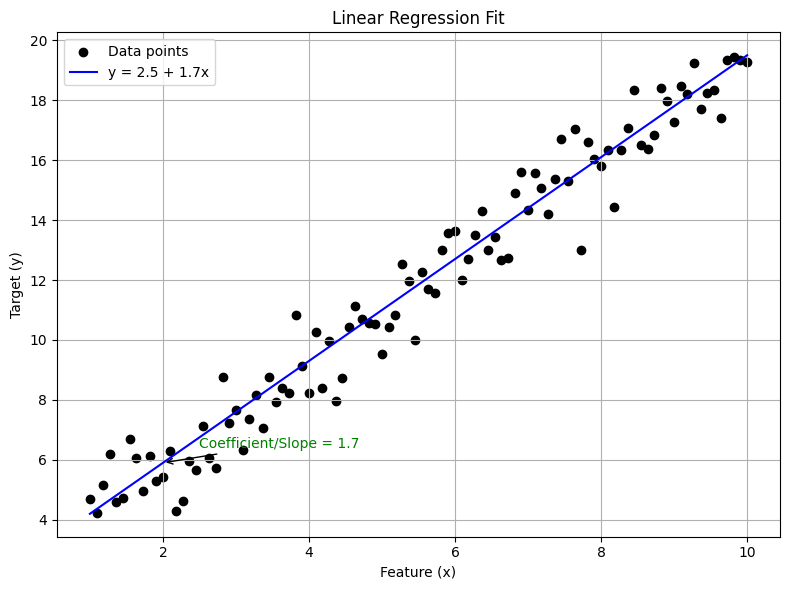

In [11]:
import matplotlib.pyplot as plt 

x_line = np.linspace(min(x_vals), max(x_vals), 100)
y_line = true_intercept + true_slope * x_line

plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y, color="black", label="Data points")
plt.plot(x_line, y_line, color="blue", label=f"y = {true_intercept} + {true_slope}x")


# Annotate slope
plt.annotate(f"Coefficient/Slope = {true_slope}",
             xy=(2, true_intercept + true_slope * 2), xytext=(2.5, true_intercept + true_slope * 2 + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"),
             fontsize=10, color="green")

# Labels and style
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()